<a href="https://colab.research.google.com/github/Gapinian/Network-Science-ICN-2024/blob/main/S2_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 2
## Generation models and graph layout algorithms

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

opt = { 'node_size': 20,
        'width': 2,
        'font_size': 5,
        'with_labels': True,
        'font_color': 'black',
        'edge_color': 'gray',
        'node_color': 'orange'}

In [ ]:
examples = [ (nx.generators.classic.complete_graph(12), 'complete'),
             (nx.generators.lattice.triangular_lattice_graph(1, 3), 'tri'),
             (nx.generators.lattice.grid_2d_graph(1, 2), 'square'),
             (nx.generators.lattice.hexagonal_lattice_graph(3, 3), 'hex'),
             (nx.generators.random_graphs.connected_watts_strogatz_graph(20, 4, 0.15), 'ws'),
             (nx.generators.random_graphs.random_regular_graph(3, 16), 'regular'),
             (nx.generators.random_graphs.gnm_random_graph(20, 35), 'erdos'),
             (nx.generators.classic.circular_ladder_graph(12), 'circ'),
             (nx.generators.classic.ladder_graph(12), 'ladder'),
             (nx.generators.random_graphs.barabasi_albert_graph(15, 3), 'ba'),
             (nx.generators.random_graphs.powerlaw_cluster_graph(20, 4, 0.15), 'tree'),
             (nx.generators.classic.star_graph(20), 'star'),
             (nx.generators.classic.barbell_graph(6, 2), 'barbell'),
             (nx.generators.classic.wheel_graph(12), 'wheel'),
             (nx.generators.classic.path_graph(12), 'path') ]

layouts = [ (nx.spectral_layout, 'spectral'),
            (nx.kamada_kawai_layout, 'KK'),
            (nx.spring_layout, 'spring'),
            (nx.circular_layout, 'circular') ]

Complete graph (#) - a graph where all nodes (#) are interconnected with edges

Triangular lattice graph (#, #) - a graph with n(#) rows of triangles and m(#) columns of triangles

Grid 2d graph (#, #) - returns a grid with n(#) rows and m(#) columns of nodes

Hexagonal lattice graph (#, #) - teturns a graph with a n(#) rows of hexagons and m(#) columns of hexagons

Star graph (#) - one center, n nodes connected only to the center

Ladder graph (#) - a ladder with # "steps"

Circular ladder graph (#) - a circled ladder with # "steps"

Wheel graph (#) - a circle of #-1 nodes interconnected + connected to a central node

Path graph (#) - a path formed with # nodes (ALL PYTHON NUMBERS USUALLY START FROM 0, SO THE LAST NODE HERE (considering # = 12) WILL BE 11)

Barbell graph (#, #) - a barbell 2 ends: both made of n(#) nodes each and connected by a path with m(#) distinct nodes on it

Connected watts strogatz graph (#, #, #) - creates a circular graph with n(#) nodes each of whcih is connected by m(#) edges with other nodes; the last # is a probability of an edge connecting a node with a non-neighboring node

Random regular graph (#, #) - a circle with n(#) nodes with d(#) edges each

Gnm random graph (#, #) - randomized structure graph; n(#) nodes with m(#) total edges

Barba albert graph (#, #) - "rich get richer": n(#) nodes with m(#) edges attaching each node to an existing node, with every next node having more probability of connecting to previous nodes with MORE connections rather than to those with less connections







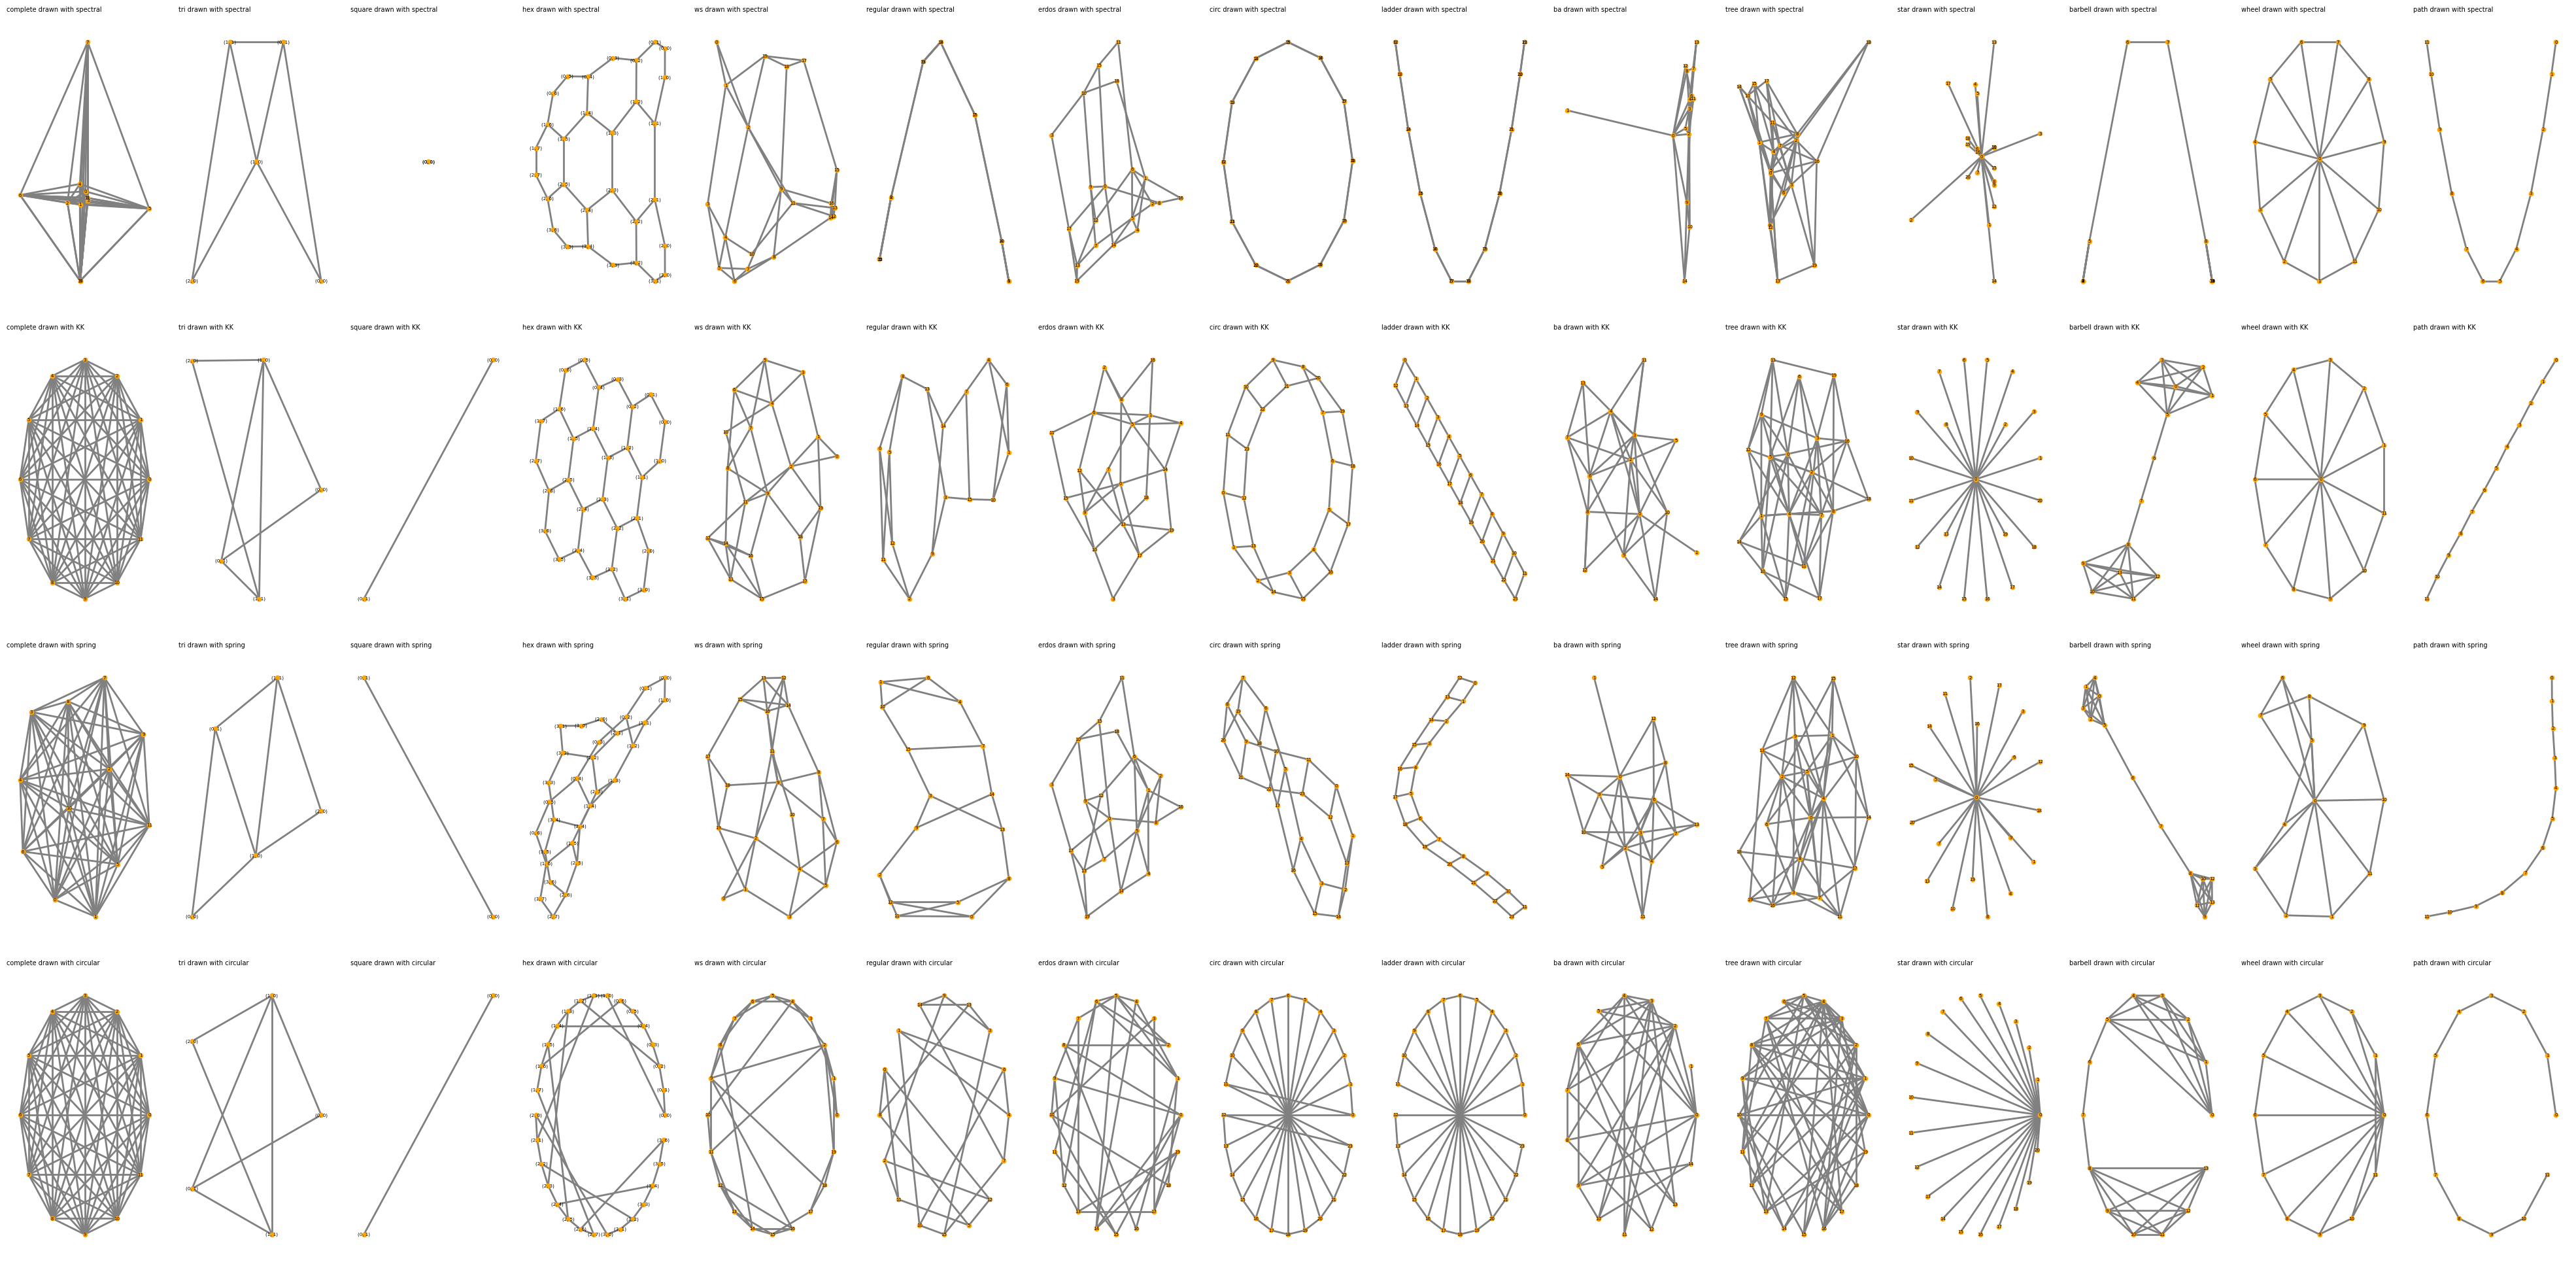

In [ ]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout = False, figsize = (40, 20))

rows = len(layouts)
cols = len(examples)
gs = GridSpec(rows, cols, figure = fig, wspace = 0.1, hspace = 0.1)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 0.95, bottom = 0, right = 1, left = 0.02, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

row = 0
col = 0
for (l, ll) in layouts:
  for (G, gl) in examples:
    ax = fig.add_subplot(gs[row, col])
    col += 1
    if col == cols:
      row += 1
      col = 0
    nx.draw(G, pos = l(G), ax = ax, **opt)
    _ = ax.axis('off')
    plt.title(gl + ' drawn with ' + ll, loc = 'left', fontsize = 7)
fig.show()

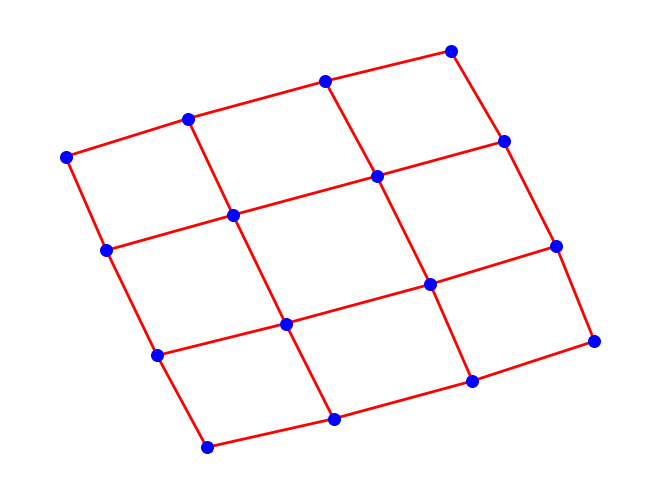

In [ ]:
square = nx.generators.lattice.grid_2d_graph(4, 4)
opt = {'node_size': 70,
        'width': 2,
        'font_size': 5,
        'with_labels': False,
        'font_color': 'white',
        'edge_color': 'red',
        'node_color': 'blue'}
layouts = nx.spectral_layout
nx.draw(square, **opt)


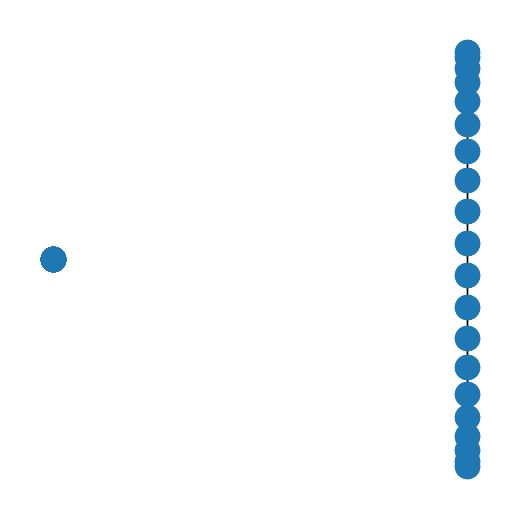

In [ ]:
from networkx.generators.random_graphs import powerlaw_cluster_graph
plt.rcParams["figure.figsize"] = (5, 5)
c1 = nx.spectral_layout(combo)
nx.draw(combo, pos = c1)

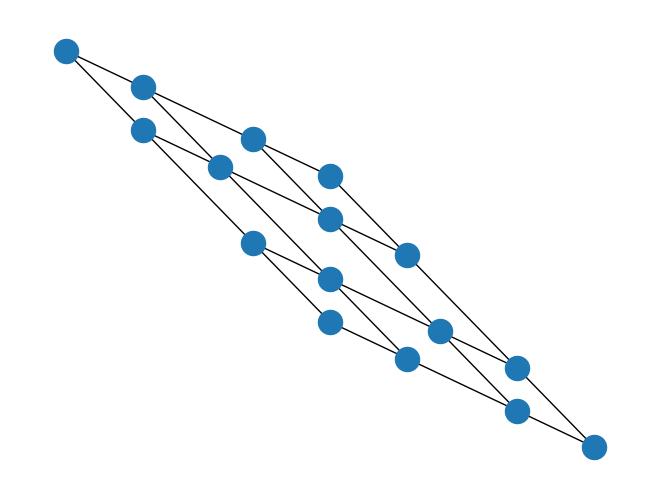

In [ ]:
c2 = nx.spectral_layout (square, scale = 55) # another layout
nx.draw(square, pos = c2)

How to put these pictures in LaTeX?

In [ ]:
!pip install network2tikz

In [ ]:
from network2tikz import plot
import pydot
import networkx.drawing

In [ ]:
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!pip install pygraphviz

In [ ]:
opt = {}


newnames = dict()
nextid = 1
for v in square.nodes():
  newnames[v] = nextid
  nextid += 1
square = nx.relabel_nodes(square, newnames, copy=False)
opt['node_label'] = [ 'x' + str(v).replace(',','').replace(' ', 'v').replace('(', '').replace(')', '') for v in square.nodes() ]
opt['node_color'] = 'pink'
opt['node_opacity'] = 0.95
opt['edge_curved'] = 0.8
cs = nx.spectral_layout (square, scale = 55)
plot( (square.nodes(), square.edges()), 'temp.tex', **opt, layout = cs)

What does this file contain?

In [ ]:
with open('temp.tex') as source:
  for line in source:
    print(line.strip())

\documentclass{standalone}
\usepackage{tikz-network}
\begin{document}
\begin{tikzpicture}
\clip (0,0) rectangle (6,6);
\Vertex[x=5.650,y=0.513,color=pink,opacity=0.95,label=x1]{1}
\Vertex[x=4.874,y=0.973,color=pink,opacity=0.95,label=x2]{2}
\Vertex[x=3.776,y=1.625,color=pink,opacity=0.95,label=x3]{3}
\Vertex[x=3.000,y=2.085,color=pink,opacity=0.95,label=x4]{4}
\Vertex[x=4.874,y=1.509,color=pink,opacity=0.95,label=x5]{5}
\Vertex[x=4.098,y=1.970,color=pink,opacity=0.95,label=x6]{6}
\Vertex[x=3.000,y=2.621,color=pink,opacity=0.95,label=x7]{7}
\Vertex[x=2.224,y=3.081,color=pink,opacity=0.95,label=x8]{8}
\Vertex[x=3.776,y=2.919,color=pink,opacity=0.95,label=x9]{9}
\Vertex[x=3.000,y=3.379,color=pink,opacity=0.95,label=x10]{10}
\Vertex[x=1.902,y=4.030,color=pink,opacity=0.95,label=x11]{11}
\Vertex[x=1.126,y=4.491,color=pink,opacity=0.95,label=x12]{12}
\Vertex[x=3.000,y=3.915,color=pink,opacity=0.95,label=x13]{13}
\Vertex[x=2.224,y=4.375,color=pink,opacity=0.95,label=x14]{14}
\Vertex[x=1.126,y

[The result in overleaf](https://www.overleaf.com/read/tjrgjbrqrqtr#941489)